In [90]:
using LinearAlgebra
using Plots
pyplot()

Plots.PyPlotBackend()

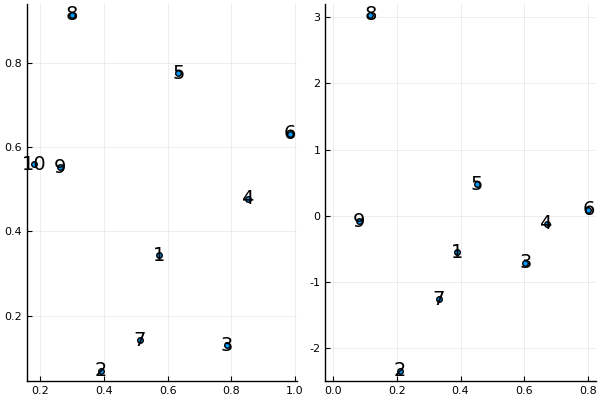

posx and posy should be finite values
posx and posy should be finite values


In [86]:
pts = rand(2,10)

(x0, min_ix) = findmin(pts[1,:])
y0 = pts[2,min_ix]
(x0,y0,min_ix)

ix = 1:size(pts)[2]
plot([[pts[1,i] for i in ix],
        [pts[1,i]-x0 for i in ix]],
    [[pts[2,i] for i in ix],
        [(pts[2,i]-y0)/(pts[1,i]-x0) for i in ix]],
    layout=(1,2),
    seriestype=:scatter,
    series_annotations=[string(i) for i in ix],
    legend=false,
    )

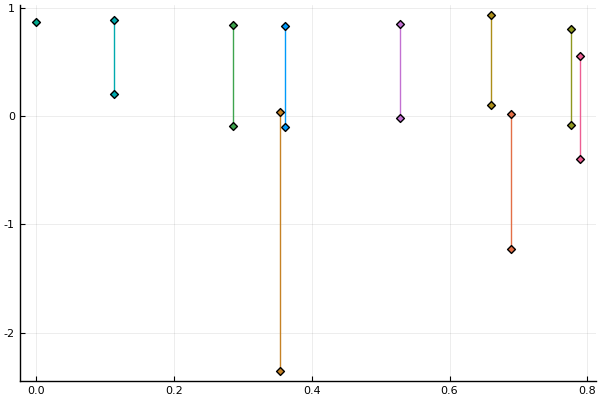

In [80]:
ix = 1:size(pts)[2]
plot([[pts[1,i]-x0, pts[1,i]-x0] for i in ix],
    [[pts[2,i], (pts[2,i]-y0)/(pts[1,i]-x0)] for i in ix],
    labels=[string(i) for i in ix],
    m=:diamond,
    legend=false,
    )

In [6]:
rot = function(theta)
    [
        cos(theta) -sin(theta);
        sin(theta) cos(theta)
    ]
end

# rotation followed by projection
rp = function(theta, points)
   (rot(theta) * points)[1,:]
end

#17 (generic function with 1 method)

In [185]:
outside_normals = function(P, extrema)
    ix = copy(extrema)
    push!(ix, ix[1])
    normals = Set()
    prev = undef
    for i in ix
        if prev != undef && i != prev
            # this is not numerically stable if P[:,i] and P[:,prev] are close to each other
            normal = rot(-pi/2)*(P[:,i] - P[:,prev])
            dist = dot(normal, P[:,i])
            @assert(abs(dist - dot(normal, P[:,prev])) < 1e-10)
            union!(normals, [(dist, normal)])
        end
        prev = i
    end
    normals
end

is_outside = function(pt, normals)
    for (dist, normal) in normals
        if dot(normal, pt) > dist + 1e-10
            return true
        end
    end
    false
end

find_extrema = function(P, delta)
    [findmin(rp(-angle, P))[2] for angle in 0:delta:2*pi]
end

#879 (generic function with 1 method)

19588

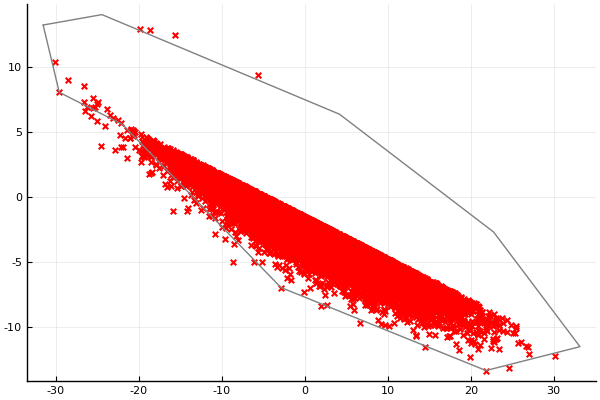

In [189]:
N = 100000
P = [7 2; -3 1]*randn(2,N)
extrema = find_extrema(P, pi/10)
normals = outside_normals(P, extrema)
outsiders = [i for i in 1:N if is_outside(P[:,i], normals)]
print(length(outsiders))
plt = plot()
if length(outsiders) > 0
    plot!(plt,
        P[1,outsiders],
        P[2,outsiders],
        color="red",
        seriestype=:scatter,
        legend=false,
        m=:x)
end
plot!(plt, P[1,extrema], P[2,extrema], color="gray")